## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.26518249],
       [0.26978175],
       [0.35948744],
       [0.51643298],
       [0.64217785]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.26208539,  0.26652109,  0.35179448,  0.49378146,  0.59894086,
        0.80216905,  0.80702497,  0.93942444,  0.98995632,  0.99052683,
        0.99808527,  0.94395843,  0.9432054 ,  0.9356255 ,  0.63778838,
        0.50109967,  0.4480218 ,  0.34802434,  0.32311582,  0.30195713,
        0.24739778,  0.09392447,  0.01097031, -0.00862995, -0.02187931,
       -0.11109553, -0.19953077, -0.23619452, -0.5712397 , -0.68930731,
       -0.83722107, -0.9118248 , -0.92466424, -0.94251607, -0.94734561,
       -0.99015404, -0.99946791, -0.99227981, -0.98347975, -0.97129808])

In [5]:
np.sin( X )[:5]

array([[0.26208539],
       [0.26652109],
       [0.35179448],
       [0.49378146],
       [0.59894086]])

In [6]:
plt.plot( X, y )
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

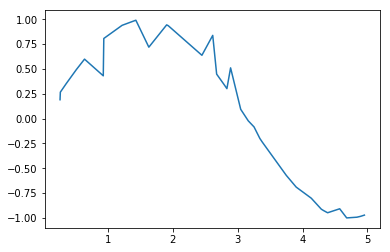

In [8]:
plt.plot( X, y )
plt.show()

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [11]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 5

In [12]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

In [13]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

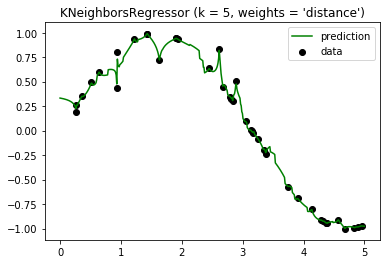

In [14]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()